<a href="https://colab.research.google.com/github/gkadusumilli/CNN-architectures/blob/main/AlexNet_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>CNN Architectures </center>


#<center> Part 2: AlexNet implementation using keras<center>

In this notebook we will build AlexNet model from the scratch using keras.

Link to the AlexNet Paper: http://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf

**AlexNet was proposed by Krizhevsky et al. in the year 2012.**

The architecture contain five convolutional layers, max-pooling layers, three fully connected layers and finally a softmax function.


AlexNet architecture

![AlexNet](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_06.png)


AlexNet Architecture

**Input Image --> Conv1 --> Pool2 --> Conv3 --> Pool4 --> Conv5 --> Conv6 --> Conv7 --> Pool8 --> FC9 --> FC10 --> Softmax7**

###Novel features of AlexNet

**1. Introducing ReLU Activation function**
> * ReLu was used in the hidden layers
> * ReLu converges faster this is because the derivative of the sigmoid function becomes very small in the saturating region and hence the updates applied to the weights almost vanish. This phenomenon is called **Vanishing gradient problem**
> * ReLu represented as $f(x) = max(0, x)$

* To understand ***vanishing gradient problem***: A large change in the input of the sigmoid function causes a negligible change in the output

**2. Dropout layer**
> * Dropout layers are used to prevent the neural network from the overfitting.
> * The neurons that are ***dropped out*** will not be used during forward and backward propagation.
> * This means eac time an input is fed, the neural network samples a different architecture, but all these share same weights. This technique reduces complex co-adaptions of other neurons.
> * Hence neuron is forced to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
> * Authors have used dropout with the probability of 0.5 in the two fully connected layers.

**3. Data augmentation**
> * Data augmentation is a key technique to avoid the overfitting of the data
> * Generated synthetic data using label-preserving transformations.
> * Data augmentation technique involves ***Rotation***, ***flipping***, ***Translation***, ***scaling***, ***De-texturized***, ***De-coloring***, ***Edge enhanced***, ***Salient edge map***

**4. Local response normalization**
> * details please refer: https://prateekvjoshi.com/2016/04/05/what-is-local-response-normalization-in-convolutional-neural-networks/

**5. Weight regularization**
> * The authors have used a weight decay of 0.0005.

> * Similar to the **L2 regularization**

>> L2 regularization is that it penalizes the error function by adding a regularization term. This in turn reduces the weight values of the hidden units and makes them too small.

>>Regularization procedure:
>>>* First we update the error function by adding regularization term

>>>>>Error function = $Error function_{old}$ + Regularization term

>>>>>*Error function can be MSE or Cross-entropy*

>>>* Regularization term
>>>>> L2 regularization term = $\frac{\lambda}{2m}\times \sum \left \| w \right \|^2$

>>>>> where lambda $lambda(\lambda)$ is the regularization parameter, $m$ is the number of instances, and $w$ is the weight.

>>>* Updated regularization term
>>>>>Error function = $Error function_{old}$ + $\frac{\lambda}{2m}\times \sum \left \| w \right \|^2$

**6. Training on Multiple GPU's**

>* The authors have used GTX580 GPU with 3GB of memory but the memory and computation was not enough to train 1.2 million training examples in the dataset. Therefore team developed a complicated way to spread the network across two GPU's 



------------------------------------------------------------------------------------





* **Number of filters in each convolutional layer**

>>Depth (Number of filters)

>>Conv 1 - 6

>>Conv 3 - 16

>>Conv 5 - 120 

* **The authors have used different kernel_sizes 11 x 11, 5 x 5, and 3 x 3**

* **Max-pooling layers**

>>The **pool size is 3 x 3**, added in middle of the each convolutional layers.

>>*The authors have used **max-pooling**, which computes the maximum value of its inputs.*

* **Activation function**: The creators have used **ReLu** activation function for the hidden layers. Since ReLu has showed faster during training when used in between the hidden layers*

>>$f(x) = max(0, x)$


Summary of the layers stacked toghether are as follows

* Conv1--> Kernel size = 11 x 11, depth = 96, and stride = 4

* Conv2-->Kernel size = 5, depth = 256, and stride = 1

* Pool-->3 x 3, which downsamples its input dimensions from 27 x 27 to 13 x 13

* Conv3-->Kernel size = 3, depth = 384, and stride = 1

* Conv4-->Kernel size = 3, depth = 384, and stride = 1

* Conv5-->Kernel size = 3, depth = 256, and stride = 1

* Pool-->Size = 3 x 3, downsamples its input from 13 x 13 to 6 x 6

* Flatten layer-->Flattens the dimensions volume 6 x 6 x 256 to 1 x 9216 (i.e 6 x 6 x 256 = 9216)

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer with 1000 neurons







formula to calculate the layer dimensions

$N_{out} = {\frac{[n_{in} + 2p - k]}{s}} + 1$

Example

* **Conv layer 1**

> * Input image size 227 x 227 x 3
> * Kernel size 11 x 11
> * Stride 4 (Shrinks input dimensions roughly by a factor of 4) 
> * Depth 96


>>$Conv 1 = {\frac{[227 + (2\times 0) - 11]}{4}} + 1$ = $55$

> * Depth is the number of filters in the conv layer is 96 hence the output dimensions are 55 x 55 x 96

* Pooling - Max- pooling of (3, 3) result 

>>$Pool = {\frac{[55 + (2 \times 0) - 3]}{2}} + 1$ = $27$
>>The pooling layer does not change the depth of the volume. The output dimensions are 27 x 27 x 96

* **Conv layer 2**
> * Kernel size 5 x 5

> * Stride 1 

> * Depth 256

> > $Conv 2 = {\frac{[27 + (2 \times 2) - 5]}{1}} + 1$ = $27$

>>> * Depth is the number of filters in the conv layer is 256 hence the output dimensions are 27 x 27 x 256

* **Pooling** - Max- pooling of (3, 3) result 

>>$Pool = {\frac{[27 + (2 \times 0) - 3]}{2}} + 1$ = $13$

>>Since the pooling layer does not change the depth of the volume. The output dimensions are 13 x 13 x 256

* **Conv layer 3**

> * Kernel size 3 x 3

> * Stride 1 

> * Depth 384

> > $Conv 3 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 384

* **Conv layer 4**

> * Kernel size 3 x 3

> * Stride 1 

> * Depth 384

> > $Conv 4 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 384

* **Conv layer 5**

> * Kernel size 3 x 3

> * Stride 1 

> * Depth 256

> > $Conv 5 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 256

* **Pooling** - Max- pooling of (3, 3) result 

>>$Pool = {\frac{[13 + (2 \times 0) - 3]}{2}} + 1$ = $6$

>>Since the pooling layer does not change the depth of the volume. The output dimensions are 6 x 6 x 256 

* **Flatten layer** - Flattens the dimensions volume 6 x 6 x 256 to 1 x 9216

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer with 1000 neurons







#Keras Implementation


####1. Import the dependencies

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
from keras.regularizers import l2

#Importing numpy for math operations
import numpy as np
# matplotlib to visualize the results
import matplotlib.pyplot as plt
%matplotlib inline


####2. Prepare the data

Features of the CIFAR

* 50,000 Images

* 10 categories

* Image dimensions: $32 \times 32$ color image

In [ ]:
#Download and split the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

#print the shape of x_train, x_valid, and x_test

print('x_train =', x_train.shape)
print('x_valid =', x_train.shape)
print('x_test =', x_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train = (45000, 32, 32, 3)
x_valid = (45000, 32, 32, 3)
x_test = (45000, 32, 32, 3)


####3. Visualize the training images


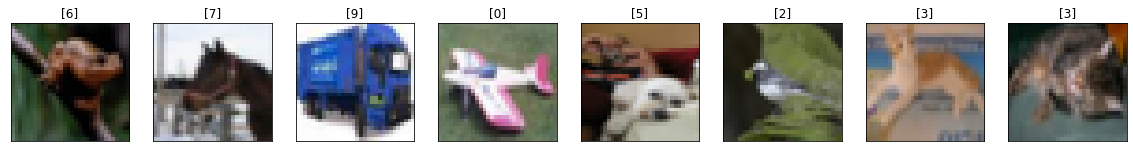

In [ ]:
#plot few 8 training images
x_train.shape, x_test.shape, x_train.shape[1:],x_train.dtype

fig = plt.figure(figsize=(20,20))
for i in range(8):
  ax = fig.add_subplot(1, 8, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i])
  ax.set_title(str(y_train[i]))

####4. Normalize the data
Normalizing the pixel values of the images by substracting the mean from each pixel and then using standard deviation


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)



####5. Preprocess the labels: Encode Categorical Integer Labels using One Hot Scheme

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
y_valid = np_utils.to_categorical(y_valid,num_classes)

#let's display one of the one-hot encoded labels


####6. Model architecture

![AlexNet](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_06.png)


In [ ]:
#build the model

model = Sequential()

#layer 1 (Conv + pool + batchnorm)
model.add(Conv2D(filters=96, kernel_size = (11,11), strides=(4,4), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

#layer 2 (Conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))
model.add(BatchNormalization())

#layer 3 (Conv + batchnorm)
#Authors did not add a pooling layer here

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#layer 4 (Conv + batchnorm)
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#layer 5 (Conv + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),padding='same',kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='same'))
#Flatten the CNN output to feed it fully connected layers
model.add(Flatten())

#layer 6 (Dense layer + dropout)
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

#layer 7 (Dense layers)
model.add(Dense(units=4096, activation = 'relu'))
model.add(Dropout(0.5))

#layer 8 (softmax output layer)
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_36 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 3, 3, 96)          384       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
activation_37 (Activation)   (None, 3, 3, 256)         0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 256)       

From the model summary
The CIFAR-10 input image dimensions is shrunk 4 times due to the use of ***Stride = 4***

####7.Data augmentation

In [ ]:
#Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 15,
    width_shift_range=0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

#ompute the data augmentaton on the training set
datagen.fit(x_train)

####8. Compiling and training

In [ ]:
from keras.callbacks import ModelCheckpoint


#reduces the learning rate by 0.1 when the validation error plateaus
checkpointer = ModelCheckpoint(filepath = 'model.125epochs.hdf5', verbose=1, save_best_only=True)
#sets the SGD optimizer with lr of 0.01 and momentum of 0.9
optimizer = keras.optimizers.SGD(lr=0.01, momentum = 0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 128),
                              callbacks=[checkpointer], steps_per_epoch = x_train.shape[0] // 128, epochs=90, verbose=2, validation_data=(x_valid, y_valid))


####9. Evaluate the model

To evaluate the model, we use a Keras function called *evaluate* and print the results

In [ ]:
scores = model.evaluate(x_test,y_test,batch_size=128,verbose=1)

print('\n Test result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))


79/79 [==============================] - 1s 16ms/step - loss: 1.3637 - accuracy: 0.7314

 Test result: 73.140 loss: 1.364


####10. Evaluate the model

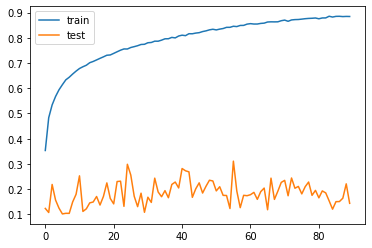

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Seems, The validation accuracy is too low

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):


    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")


#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


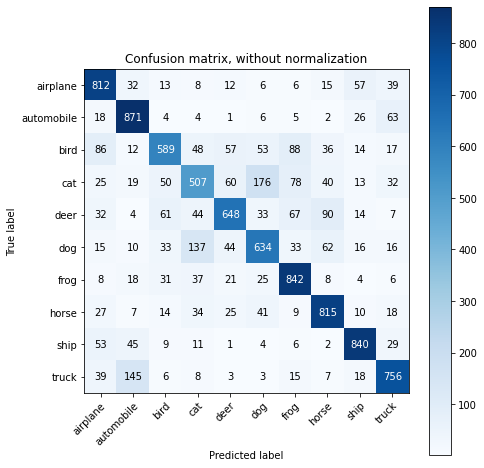

In [ ]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

References:
1. http://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf
2. http://cvml.ist.ac.at/courses/DLWT_W17/material/AlexNet.pdf
3. Deeplearning for vision
4. https://www.kaggle.com/c/cifar-10